In [12]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from mpl_toolkits.basemap import Basemap

In [13]:
# #### initialize Sets for each region (as defined by USAID / DHS) to help with data cleaning and plotting ############
subsaharan_africa_set = {"AO", "BJ", "BU", "BF", "CG", "CD", "CM", "CF", "CI", "ET", "GA", "GH", "GM", "GN", "GY", "KE",
                         "KM", "LS", "LB", "MD", "MW", "ML", "MR", "MZ", "MA", "NM", "NI", "NG", "RW", "SN", "ZA", "SL",
                         "SZ", "TD", "TG", "TZ", "UG", "ZM", "ZW"}
north_africa_west_asia_europe_set = {"AL", "MB", "AZ", "AM", "EG", "JO", "YE"}
south_se_asia_set = {"AF", "BD", "IA", "ID", "KH", "LA", "NP", "PK", "TL", "MM", "PH"}
central_asia_set = {"KY", "TJ"}
latin_carib_set = {"CO", "HT", "HN", "PE", "DR", "BO"}

region_set = {"Sub-Saharan Africa", "North Africa/West Asia/Europe", "Central Asia", "South & Southeast Asia",
              "Latin America & Caribbean"}

## Figure (3) : Top 20 feature data PCA plot

original shape of df : (109947, 26)
shape of df after dropping nulls : (109089, 21)
Projecting 20-dimensional data to 2D using PCA
PCA explained variance ratio: [0.20638505 0.15552391]


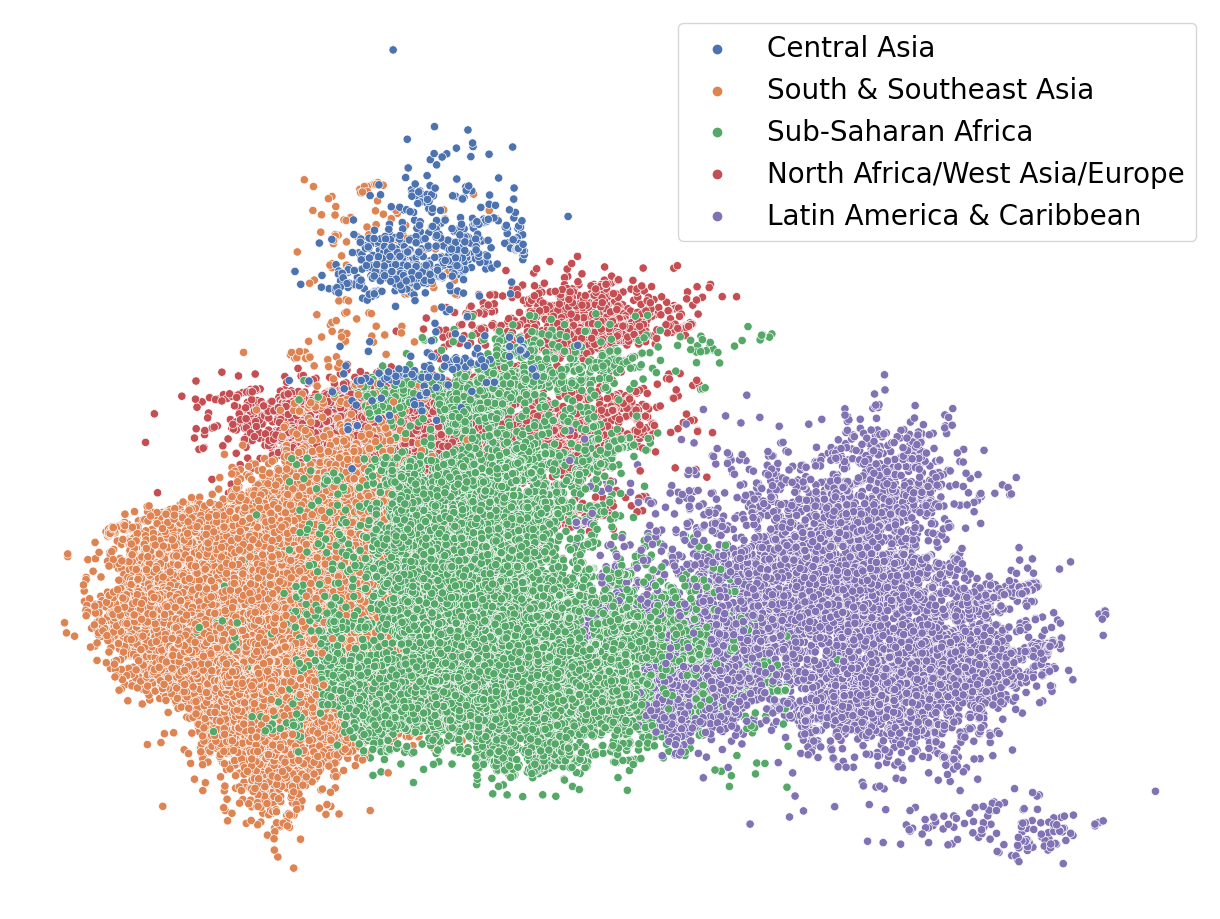

<Figure size 640x480 with 0 Axes>

In [28]:
top20_features = pd.read_csv('data/cleaned_top20features_data.csv')

# ############ pre-process data for figure (3) ############
print("original shape of df : " + str(top20_features.shape))
top20_features = top20_features[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code",
        "target_region"
    ]
]
top20_features = top20_features.dropna()
print("shape of df after dropping nulls : " + str(top20_features.shape))

y = np.array(top20_features["target_region"]).astype(float)

X = top20_features[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (3) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep')

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
regions = ["Central Asia", "South & Southeast Asia", "Sub-Saharan Africa",
           "North Africa/West Asia/Europe", "Latin America & Caribbean"]

leg = plt.legend(loc=1, bbox_to_anchor=(1, 1), prop={"size":20})
for i,r in enumerate(regions):
    leg.get_texts()[i].set_text(r)
    
plt.savefig('figure/PCA_feature_data_DHS_Regions_numFeatures_20.png', dpi=200)
plt.show()
plt.clf()

## Figure (4) : Outcome data PCA plot

original shape of df : (114112, 18)
shape of df after dropping nulls : (50886, 7)
Projecting 6-dimensional data to 2D using PCA
PCA explained variance ratio: [0.50815271 0.1715807 ]


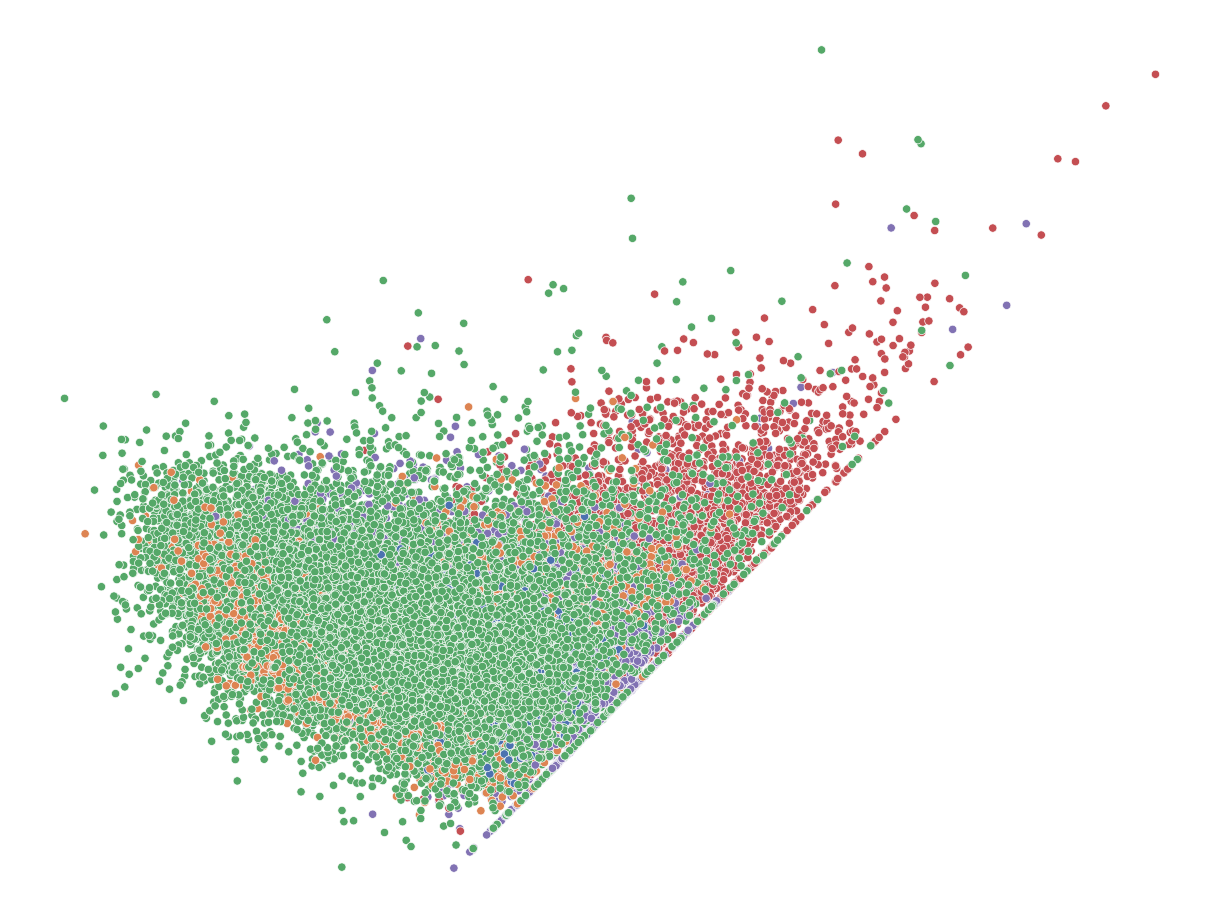

<Figure size 640x480 with 0 Axes>

In [29]:
outcome_data_cleaned = pd.read_csv('data/cleaned_hi.csv')

# ############ pre-process data for figure (4) ############
print("original shape of df : " + str(outcome_data_cleaned.shape))
outcome_data_cleaned = outcome_data_cleaned[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate",
        "Under5_Mortality_Rate",
        "Skilled_Birth_Attendant_Rate",
        "Stunted_Rate",
        "target_region"
    ]
]
outcome_data_cleaned = outcome_data_cleaned.dropna()
print("shape of df after dropping nulls : " + str(outcome_data_cleaned.shape))

y = np.array(outcome_data_cleaned["target_region"]).astype(float)

X = outcome_data_cleaned[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate",
        "Under5_Mortality_Rate",
        "Skilled_Birth_Attendant_Rate",
        "Stunted_Rate"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (4) ############ 
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep', legend=False)

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
# regions = ["Central Asia", "South & Southeast Asia", "Sub-Saharan Africa",
#            "North Africa/West Asia/Europe", "Latin America & Caribbean"]

# leg = plt.legend(loc='upper left', prop={"size":20})
# for i,r in enumerate(regions):
#     leg.get_texts()[i].set_text(r)
    
plt.savefig('figure/PCA_outcome_data_DHS_Regions_numFeatures_6.png', dpi=200)
plt.show()
plt.clf()

## Figure (5) : Top 20 feature data PCA plot - India vs. S&SE Asia

original shape of df : (109947, 26)
shape of df after dropping nulls : (41235, 21)
Projecting 20-dimensional data to 2D using PCA
PCA explained variance ratio: [0.23053627 0.12558642]


C:\Users\lukec\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


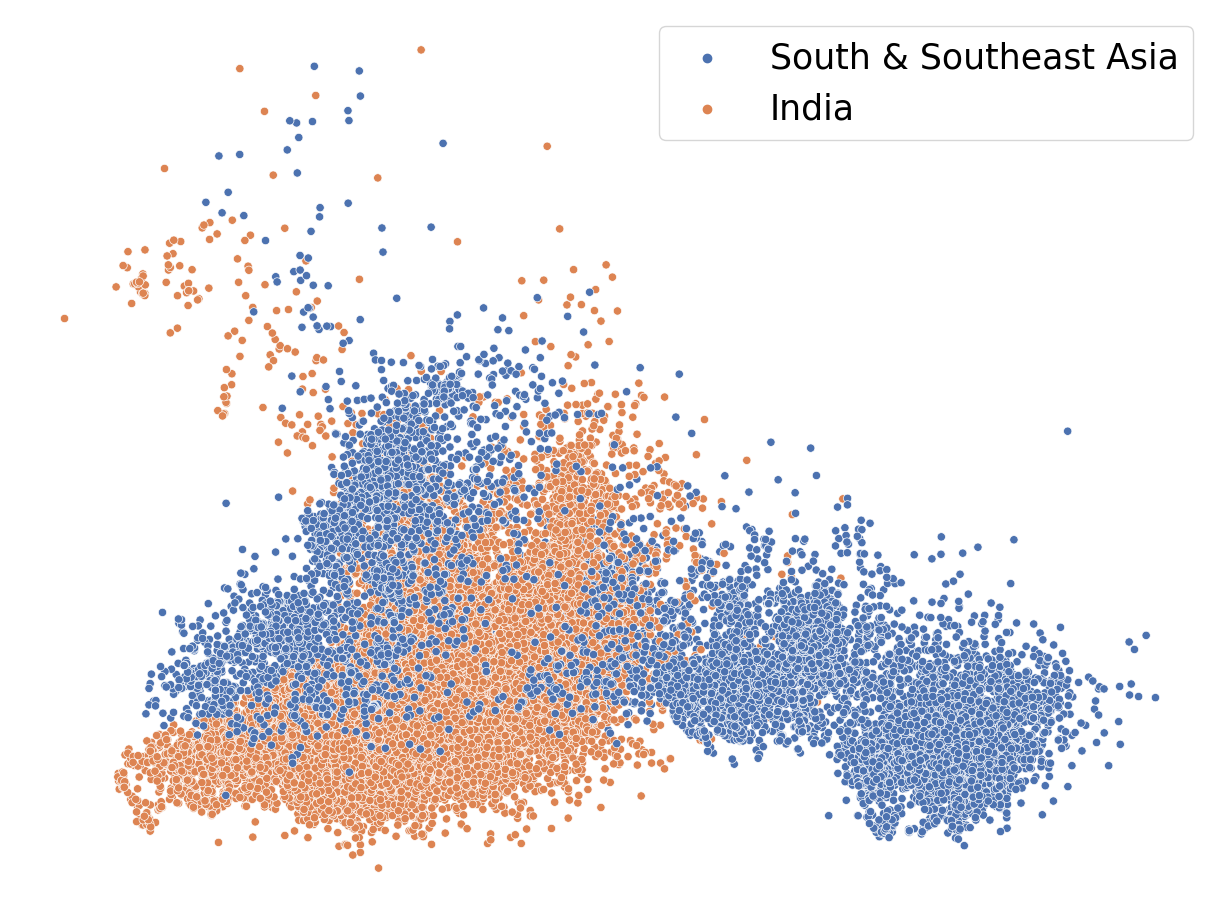

<Figure size 640x480 with 0 Axes>

In [37]:
top20_features = pd.read_csv('data/cleaned_top20features_data.csv')

# ############ pre-process data for figure (5) ############
print("original shape of df : " + str(top20_features.shape))
df_filtered = top20_features.loc[top20_features['Country_Code'].isin(south_se_asia_set)]
df_filtered.loc[df_filtered['Country_Code'] == "IA", 'target_country'] = 1
df_filtered.loc[df_filtered['Country_Code'] != "IA", 'target_country'] = 0

df_filtered = df_filtered[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code",
        "target_country"
    ]
]
df_filtered = df_filtered.dropna()
print("shape of df after dropping nulls : " + str(df_filtered.shape))

y = np.array(df_filtered["target_country"]).astype(float)

X = df_filtered[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (5) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep')

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
leg = plt.legend(loc='upper right', prop={"size":25})

leg.get_texts()[0].set_text("South & Southeast Asia")
leg.get_texts()[1].set_text("India")
    
plt.savefig('figure/PCA_top_features_India_vs_SSE_Asia_numFeatures_20.png', dpi=200)
plt.show()
plt.clf()

## Figure (6) : Outcome data PCA plot - India vs. S&SE Asia

original shape of df : (114112, 18)
original shape of df : (114112, 18)
shape of df after dropping nulls : (36390, 4)
Projecting 3-dimensional data to 2D using PCA
PCA explained variance ratio: [0.65498183 0.32212918]


C:\Users\lukec\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


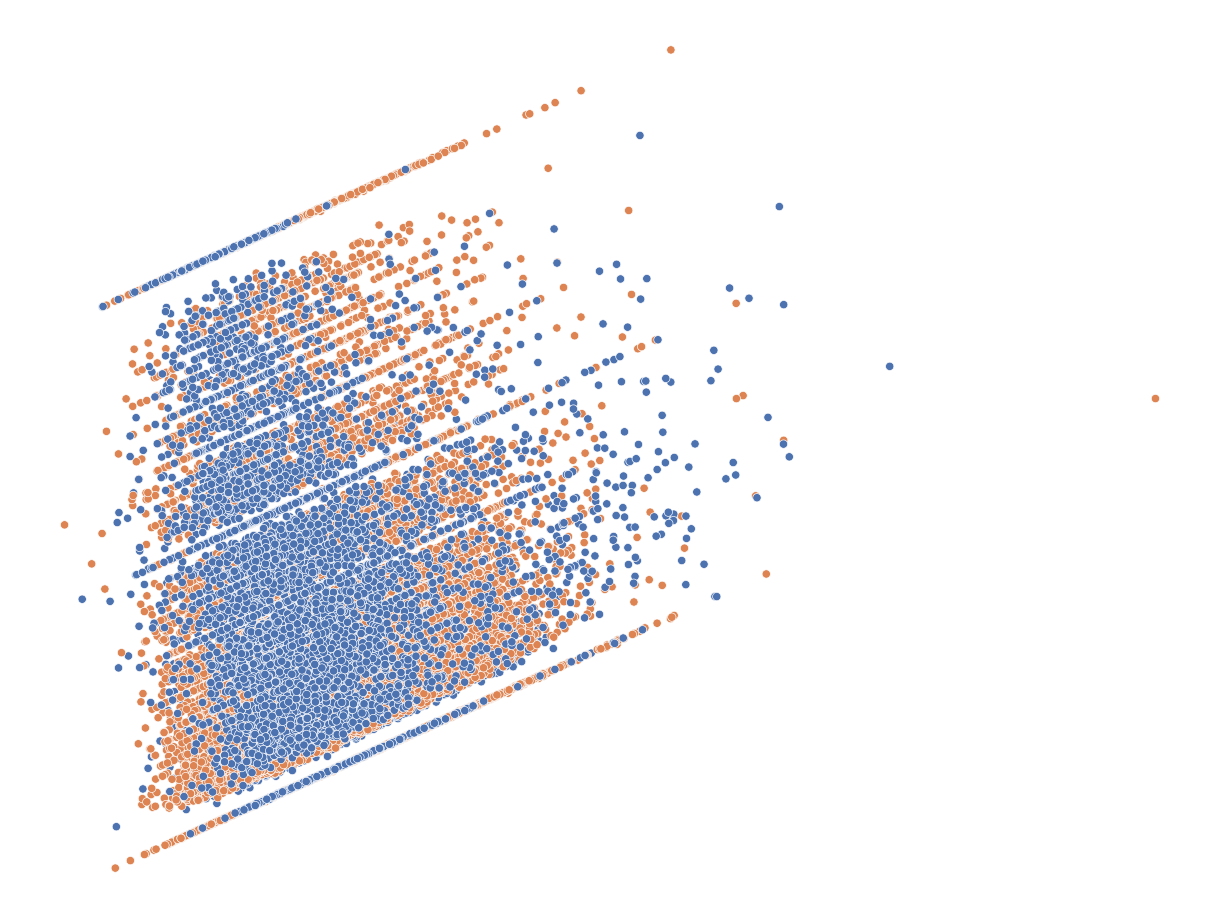

<Figure size 640x480 with 0 Axes>

In [32]:
outcome_data_cleaned = pd.read_csv('data/cleaned_hi.csv')

# ############ pre-process data for figure (6) ############
print("original shape of df : " + str(outcome_data_cleaned.shape))
df_filtered = outcome_data_cleaned.loc[outcome_data_cleaned['Country_Code'].isin(south_se_asia_set)]
df_filtered.loc[df_filtered['Country_Code'] == "IA", 'target_country'] = 1
df_filtered.loc[df_filtered['Country_Code'] != "IA", 'target_country'] = 0

print("original shape of df : " + str(outcome_data_cleaned.shape))

# only keep top 3 outcome factors due to excess null values 
df_filtered = df_filtered[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate",
        # "Under5_Mortality_Rate",
        # "Skilled_Birth_Attendant_Rate",
        # "Stunted_Rate",
        "target_country"
    ]
]
df_filtered = df_filtered.dropna()
print("shape of df after dropping nulls : " + str(df_filtered.shape))

y = np.array(df_filtered["target_country"]).astype(float)

# only keep top 3 outcome factors due to excess null values 
X = df_filtered[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate"
        #"Under5_Mortality_Rate",
        #"Skilled_Birth_Attendant_Rate",
        #"Stunted_Rate"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (6) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep', legend=False)

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
# leg = plt.legend(loc='upper right', prop={"size":20})

# leg.get_texts()[0].set_text("South & Southeast Asia")
# leg.get_texts()[1].set_text("India")
    
plt.savefig('figure/PCA_outcome_data_India_vs_SSE_Asia_numFeatures_3.png', dpi=200)
plt.show()
plt.clf()

## Figure (7) : Top 20 feature data PCA plot - Uganda vs. Africa

original shape of df : (109947, 26)
shape of df after dropping nulls : (43401, 21)
Projecting 20-dimensional data to 2D using PCA


C:\Users\lukec\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


PCA explained variance ratio: [0.17080184 0.12504191]


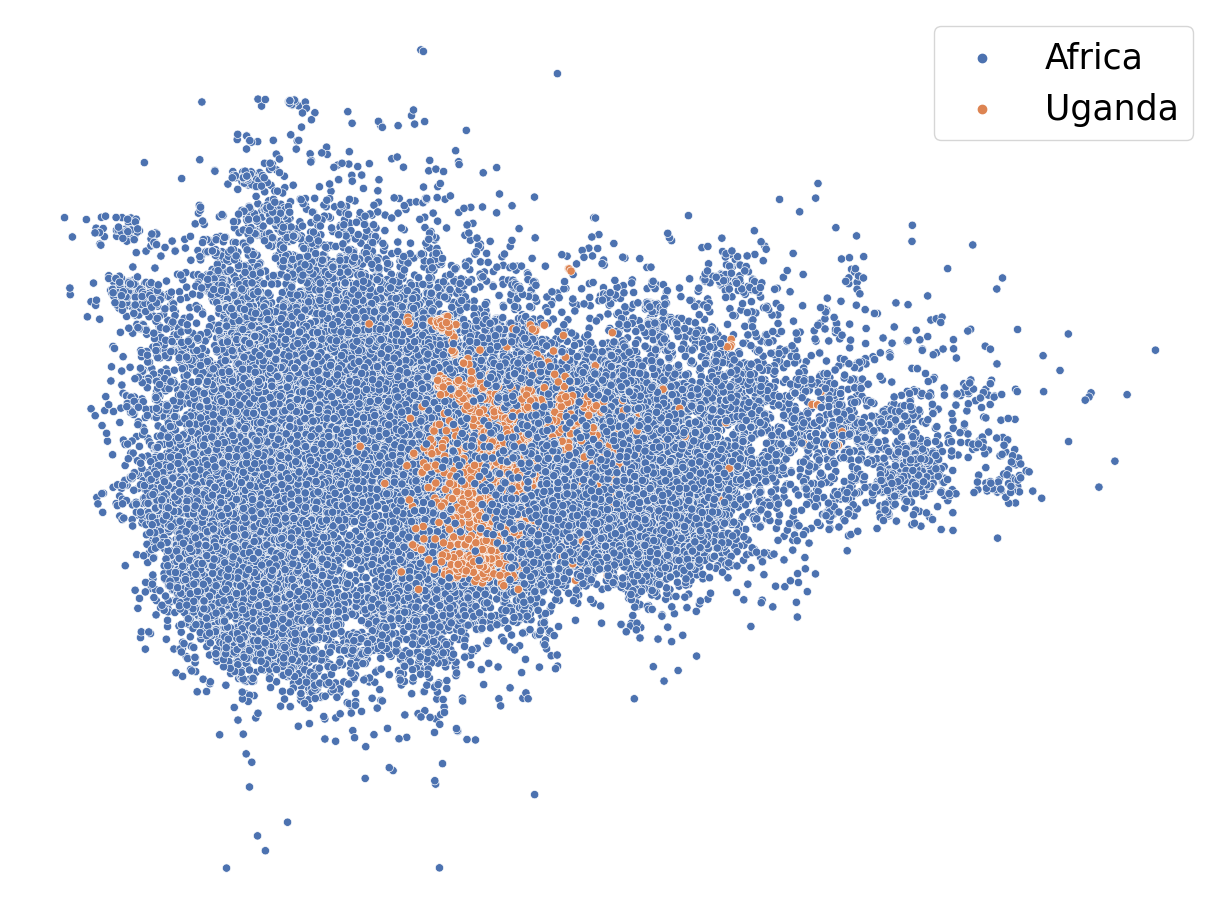

<Figure size 640x480 with 0 Axes>

In [38]:
top20_features = pd.read_csv('data/cleaned_top20features_data.csv')

# ############ pre-process data for figure (7) ############
print("original shape of df : " + str(top20_features.shape))
df_filtered = top20_features.loc[top20_features['Country_Code'].isin(subsaharan_africa_set)]
df_filtered.loc[df_filtered['Country_Code'] == "UG", 'target_country'] = 1
df_filtered.loc[df_filtered['Country_Code'] != "UG", 'target_country'] = 0

df_filtered = df_filtered[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code",
        "target_country"
    ]
]
df_filtered = df_filtered.dropna()
print("shape of df after dropping nulls : " + str(df_filtered.shape))

y = np.array(df_filtered["target_country"]).astype(float)

X = df_filtered[
    [
        "GDP ($ per capita)_x",
        "URBAN_RURA_y",
        "bio18@WORLDCLIM/V1/BIO",
        "urban-coverfraction_mean@COPERNICUS/Landcover/100m/Proba-V-C3/Global&timestamped",
        "Urban Pop %",
        "Migrants (net)",
        "Cloud_Retrieval_Fraction_ML_Ice_FMean_median@MODIS/061/MOD08_M3&timestamped",
        "Cloud_Effective_Radius_PCL_Ice_Mean_Uncertainty_median@MODIS/061/MOD08_M3&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/DAILY&timestamped",
        "accessibility_max@Oxford/MAP/accessibility_to_healthcare_2019",
        "TIMEOFDAY_median@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "AverageTemperature",
        "PET_max_max@MODIS/NTSG/MOD16A2/105&timestamped",
        "mean_sea_level_pressure_max_max@ECMWF/ERA5/MONTHLY&timestamped",
        "bio13@WORLDCLIM/V1/BIO",
        "apr_max@OpenLandMap/CLM/CLM_LST_MOD11A2-DAY_M/v01",
        "Retrieved_Temperature_Profile_Mean_Mean_700_median@MODIS/061/MOD08_M3&timestamped",
        "sub-region-code",
        "TIMEOFDAY_max_max@NOAA/CDR/AVHRR/NDVI/V5&timestamped",
        "code"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (7) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep')

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
leg = plt.legend(loc='upper right', prop={"size":25})

leg.get_texts()[0].set_text("Africa")
leg.get_texts()[1].set_text("Uganda")
    
plt.savefig('figure/PCA_top_features_Uganda_vs_Africa_numFeatures_20.png', dpi=200)
plt.show()
plt.clf()

## Figure (8) : Outcome data PCA plot - Uganda vs. Africa

original shape of df : (114112, 18)
original shape of df : (114112, 18)
shape of df after dropping nulls : (27943, 7)
Projecting 6-dimensional data to 2D using PCA
PCA explained variance ratio: [0.46127206 0.18606237]


C:\Users\lukec\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


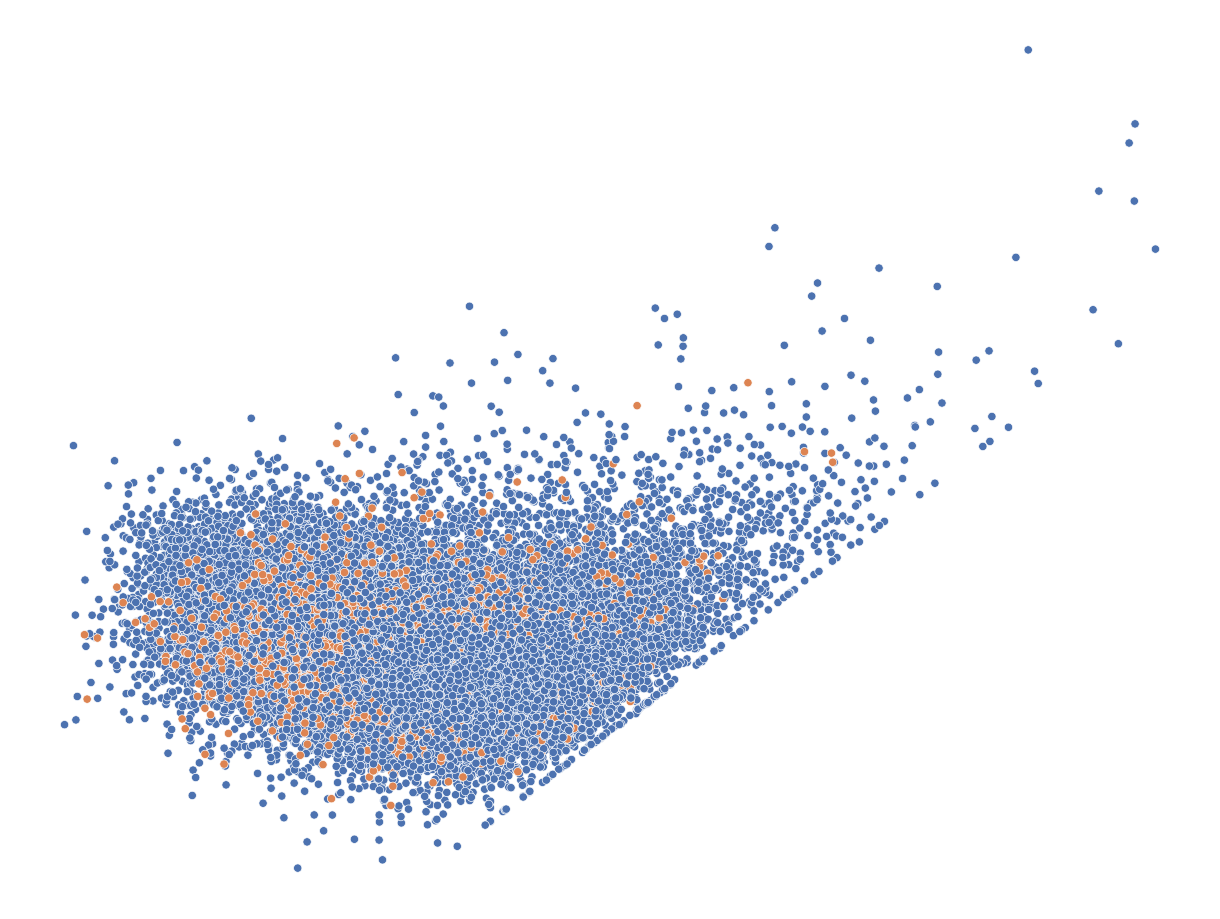

<Figure size 640x480 with 0 Axes>

In [34]:
outcome_data_cleaned = pd.read_csv('data/cleaned_hi.csv')

# ############ pre-process data for figure (8) ############
print("original shape of df : " + str(outcome_data_cleaned.shape))
df_filtered = outcome_data_cleaned.loc[outcome_data_cleaned['Country_Code'].isin(subsaharan_africa_set)]
df_filtered.loc[df_filtered['Country_Code'] == "UG", 'target_country'] = 1
df_filtered.loc[df_filtered['Country_Code'] != "UG", 'target_country'] = 0

print("original shape of df : " + str(outcome_data_cleaned.shape))

df_filtered = df_filtered[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate",
        "Under5_Mortality_Rate",
        "Skilled_Birth_Attendant_Rate",
        "Stunted_Rate",
        "target_country"
    ]
]
df_filtered = df_filtered.dropna()
print("shape of df after dropping nulls : " + str(df_filtered.shape))

y = np.array(df_filtered["target_country"]).astype(float)

X = df_filtered[
    [
        "Mean_BMI",
        "Median_BMI",
        "Unmet_Need_Rate",
        "Under5_Mortality_Rate",
        "Skilled_Birth_Attendant_Rate",
        "Stunted_Rate"
    ]
].to_numpy()

num_features = X.shape[1]

print("Projecting %d-dimensional data to 2D using PCA" % X.shape[1])

X_bar = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_normalized = (X - X_bar) / X_std
pca = decomposition.PCA(n_components=2)
X_reduced = pca.fit_transform(X_normalized)

print("PCA explained variance ratio: " + str(pca.explained_variance_ratio_))

# ############ plot figure (8) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

# try recreating above plot with seaborn
g = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                hue=y, palette='deep', legend=False)

plt.tick_params(
    axis='both',  # changes apply to the x-axis and y-axis
    which='both',  # both major and minor ticks are affected
    labelbottom=False,  # labels along bottom edge are off
    labelleft=False,  # labels along the left edge are off
    left=False,
    bottom=False)

# replace labels
# leg = plt.legend(loc='lower right', prop={"size":20})

# leg.get_texts()[0].set_text("Africa")
# leg.get_texts()[1].set_text("Uganda")
    
plt.savefig('figure/PCA_outcome_data_Uganda_vs_Africa_numFeatures_6.png', dpi=200)
plt.show()
plt.clf()

## Figure (9) : Mean BMI Density Plot by Region

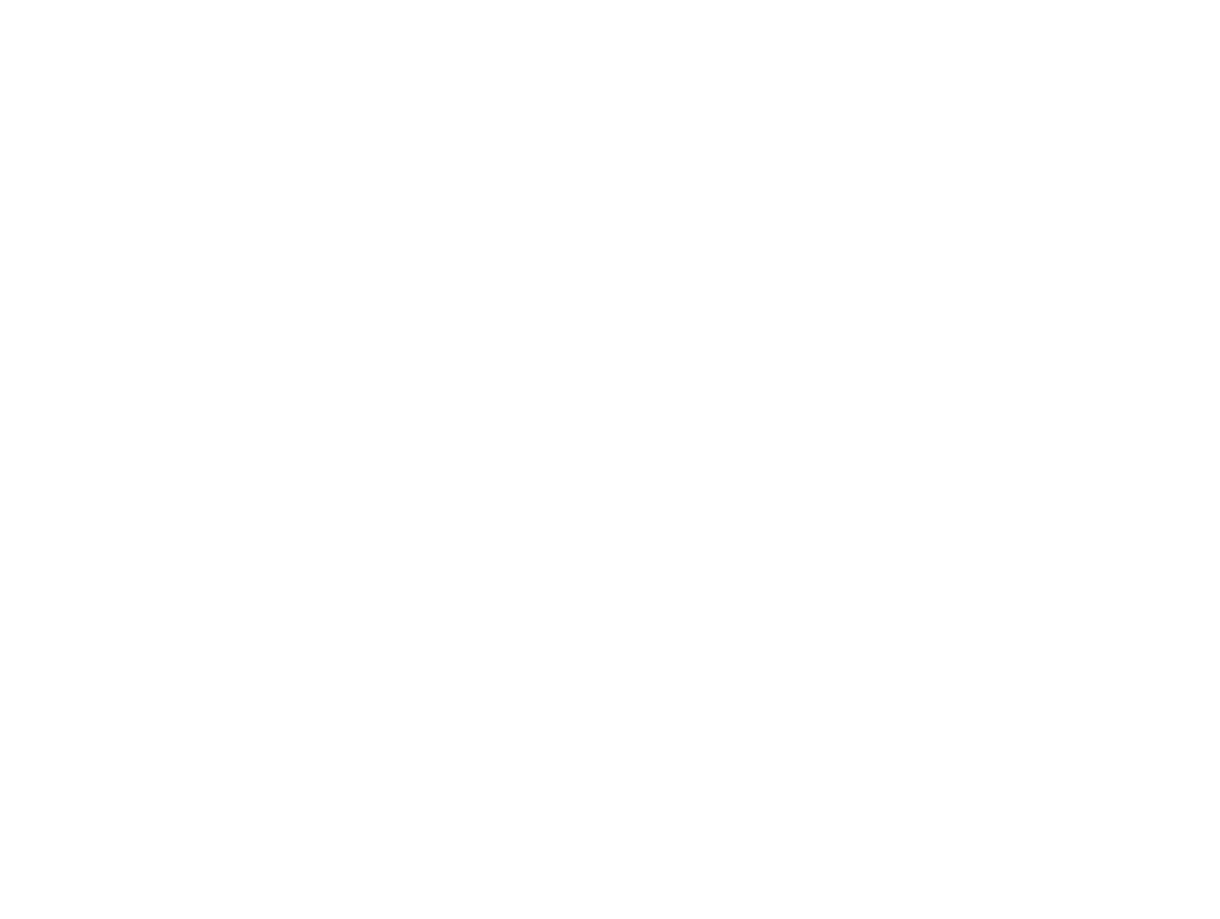

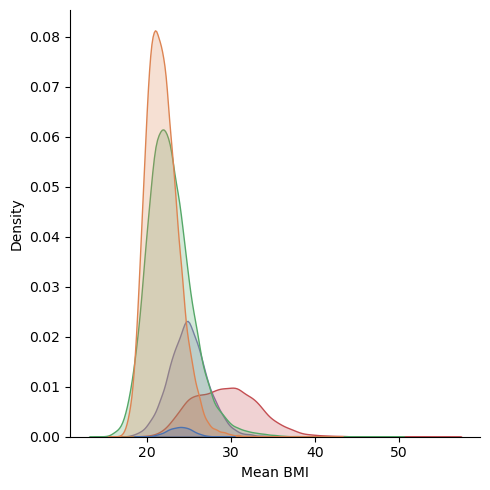

In [25]:
df = pd.read_csv('data/cleaned_hi.csv')

# ############ plot figure (9) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

g = sns.displot(df, x="Mean_BMI", hue="target_region" , kind="kde", fill=True,
                palette='deep',  facet_kws={'legend_out': False}, legend=False)
g.set(xlabel='Mean BMI')

# # title
# leg = g.axes.flat[0].get_legend()
# new_title = 'DHS Regions'
# leg.set_title(new_title)
# # replace labels
# regions = ["Central Asia", "South & Southeast Asia", "Sub-Saharan Africa",
#            "North Africa/West Asia/Europe", "Latin America & Caribbean"]
# for t, l in zip(g._legend.texts, regions):
#     t.set_text(l)       

g.savefig('figure/mean_bmi_density_byRegion', dpi=200)
plt.show()
# df[['target_region', 'Mean_BMI']].groupby('target_region').mean()

## Figure (10) : Under 5 Mortality Rate Density Plot by Region

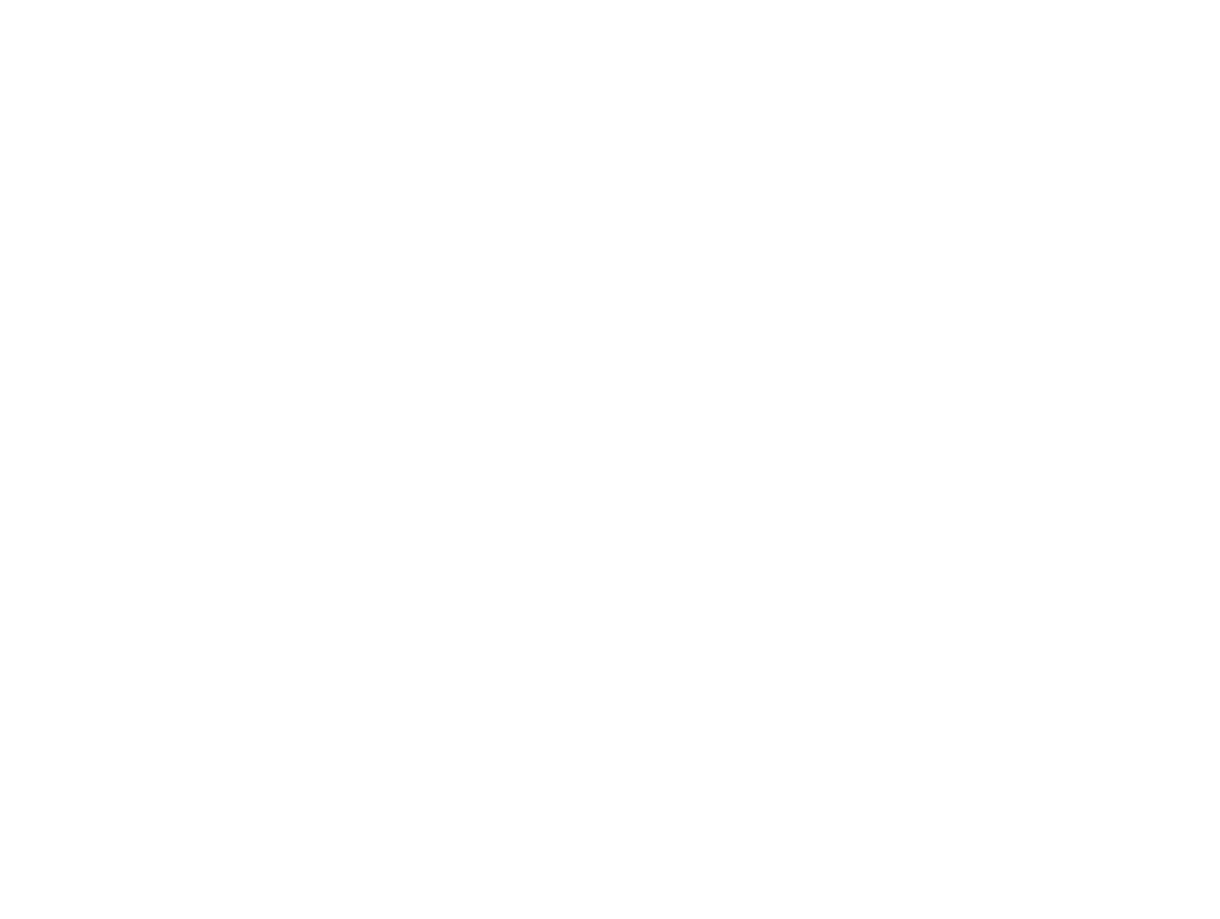

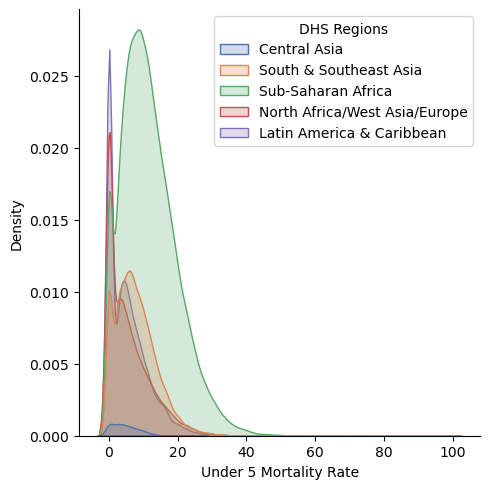

In [21]:
df = pd.read_csv('data/cleaned_hi.csv')

# ############ plot figure (10) ############
plt.style.use('default')
fig = plt.figure(figsize=(12, 9))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

g = sns.displot(df, x="Under5_Mortality_Rate", hue="target_region" , kind="kde", fill=True,
                palette='deep',  facet_kws={'legend_out': False})
g.set(xlabel='Under 5 Mortality Rate')

# title
leg = g.axes.flat[0].get_legend()
new_title = 'DHS Regions'
leg.set_title(new_title)

# replace labels
regions = ["Central Asia", "South & Southeast Asia", "Sub-Saharan Africa",
           "North Africa/West Asia/Europe", "Latin America & Caribbean"]
for t, l in zip(g._legend.texts, regions):
    t.set_text(l)       
    
g.savefig('figure/under5_mortalityRate_density_byRegion', dpi=200)
plt.show()
#df[['target_region', 'Under5_Mortality_Rate']].groupby('target_region').mean()

## Figure (11) : Mean BMI Geographic distribution Plot

(90967, 18)


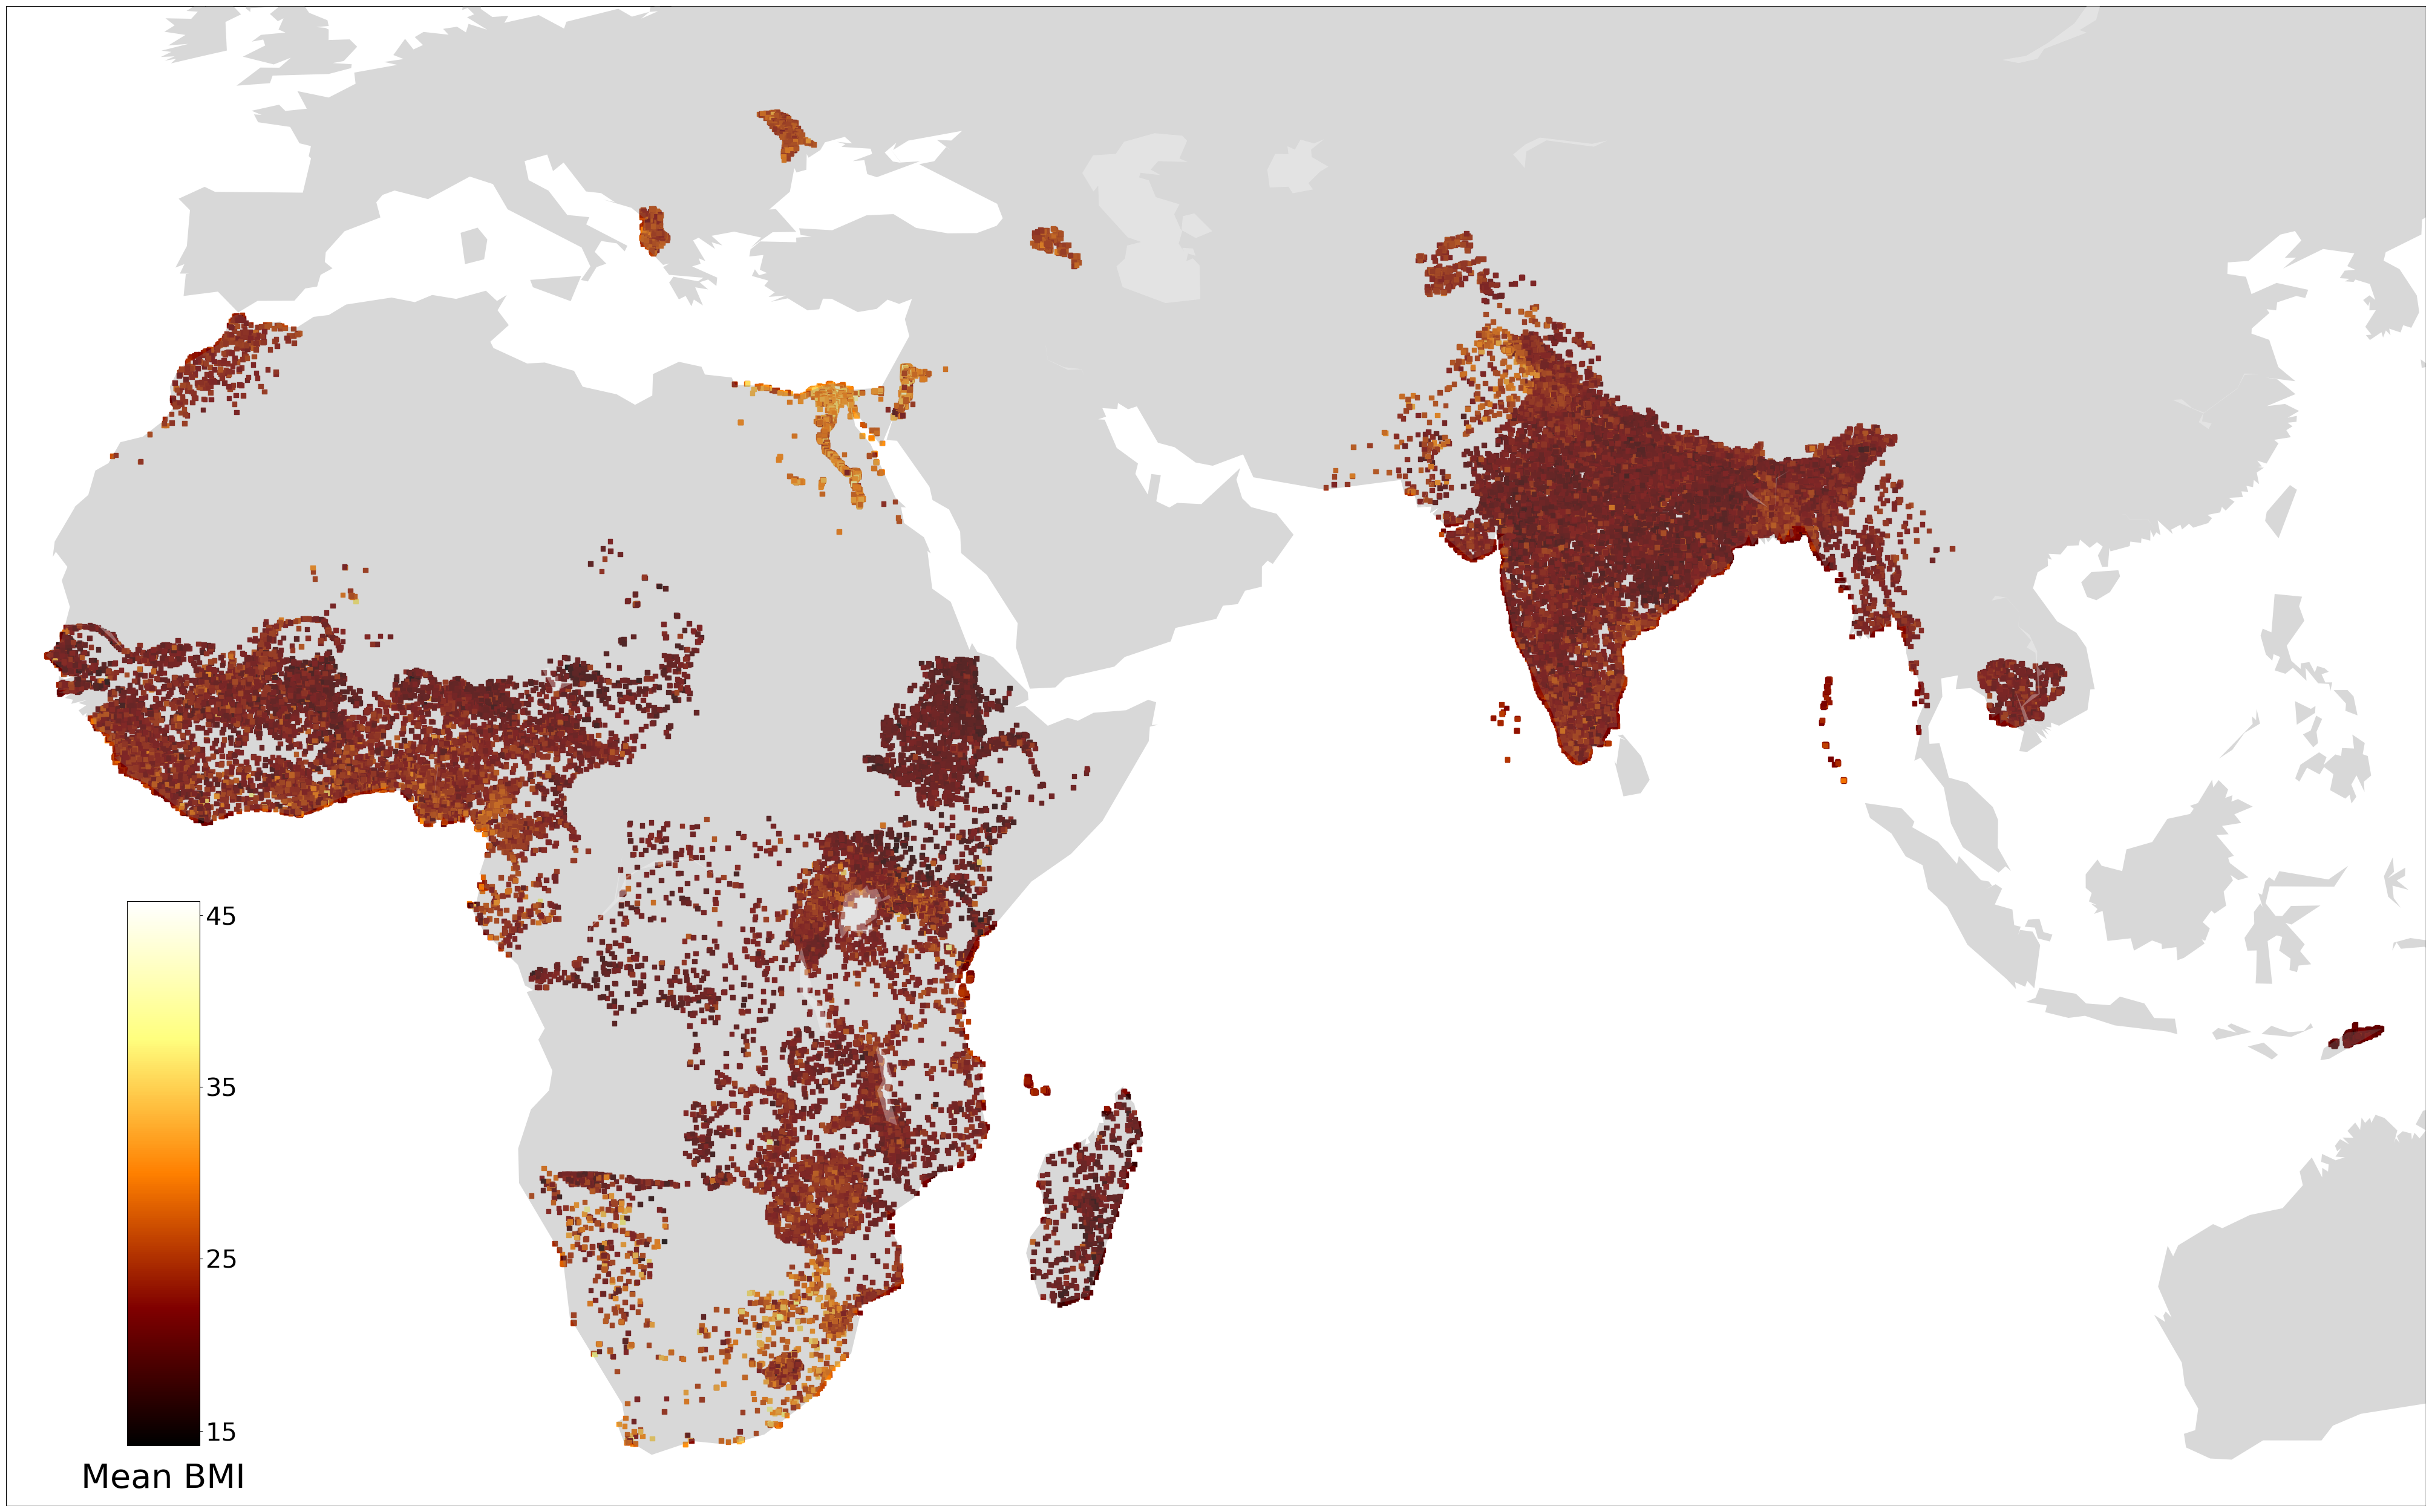

In [22]:
df = pd.read_csv('data/cleaned_hi.csv')

# ############ pre-process data for figure (11) ############

# remove data points with observations of (0.0, 0.0) for lat/lon
greater0lat = df['LATNUM'] > 0.0001
greater0lon = df['LONGNUM'] > 0.0001
mask = np.logical_or(greater0lat, greater0lon)
df_plot = df[mask]

# only 15 to 45 for Mean BMI
upperMask = df_plot['Mean_BMI'] <= 46.0
lowerMask = df_plot['Mean_BMI'] >= 14.0
mask = np.logical_and(upperMask, lowerMask)
df_plot = df_plot[mask]
print(df_plot.shape)

# ############ plot figure (11) ############
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

m=Basemap(llcrnrlon=-20, llcrnrlat=-38, urcrnrlon=130,urcrnrlat=55, projection='cyl')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey', alpha=0.3)
b = m.scatter(x=df_plot['LONGNUM'], y=df_plot['LATNUM'], latlon=True, c=df_plot['Mean_BMI'],
          cmap='afmhot', alpha=1, s=30, marker=',')

cbaxes = fig.add_axes([0.05, 0.12, 0.03, 0.3])
cb = plt.colorbar(b, cax = cbaxes)
cb.set_ticks([15, 25, 35, 45])
cb.set_ticklabels(['15', '25', '35', '45'])
cb.ax.tick_params(labelsize=30)
cbaxes.set_xlabel("Mean BMI", size=40, loc='center', labelpad=20)
plt.savefig('figure/geo_mean_bmi_15to45.png', dpi=300)
plt.show()

## Figure (12) : Under 5 Mortality Rate Geographic distribution Plot

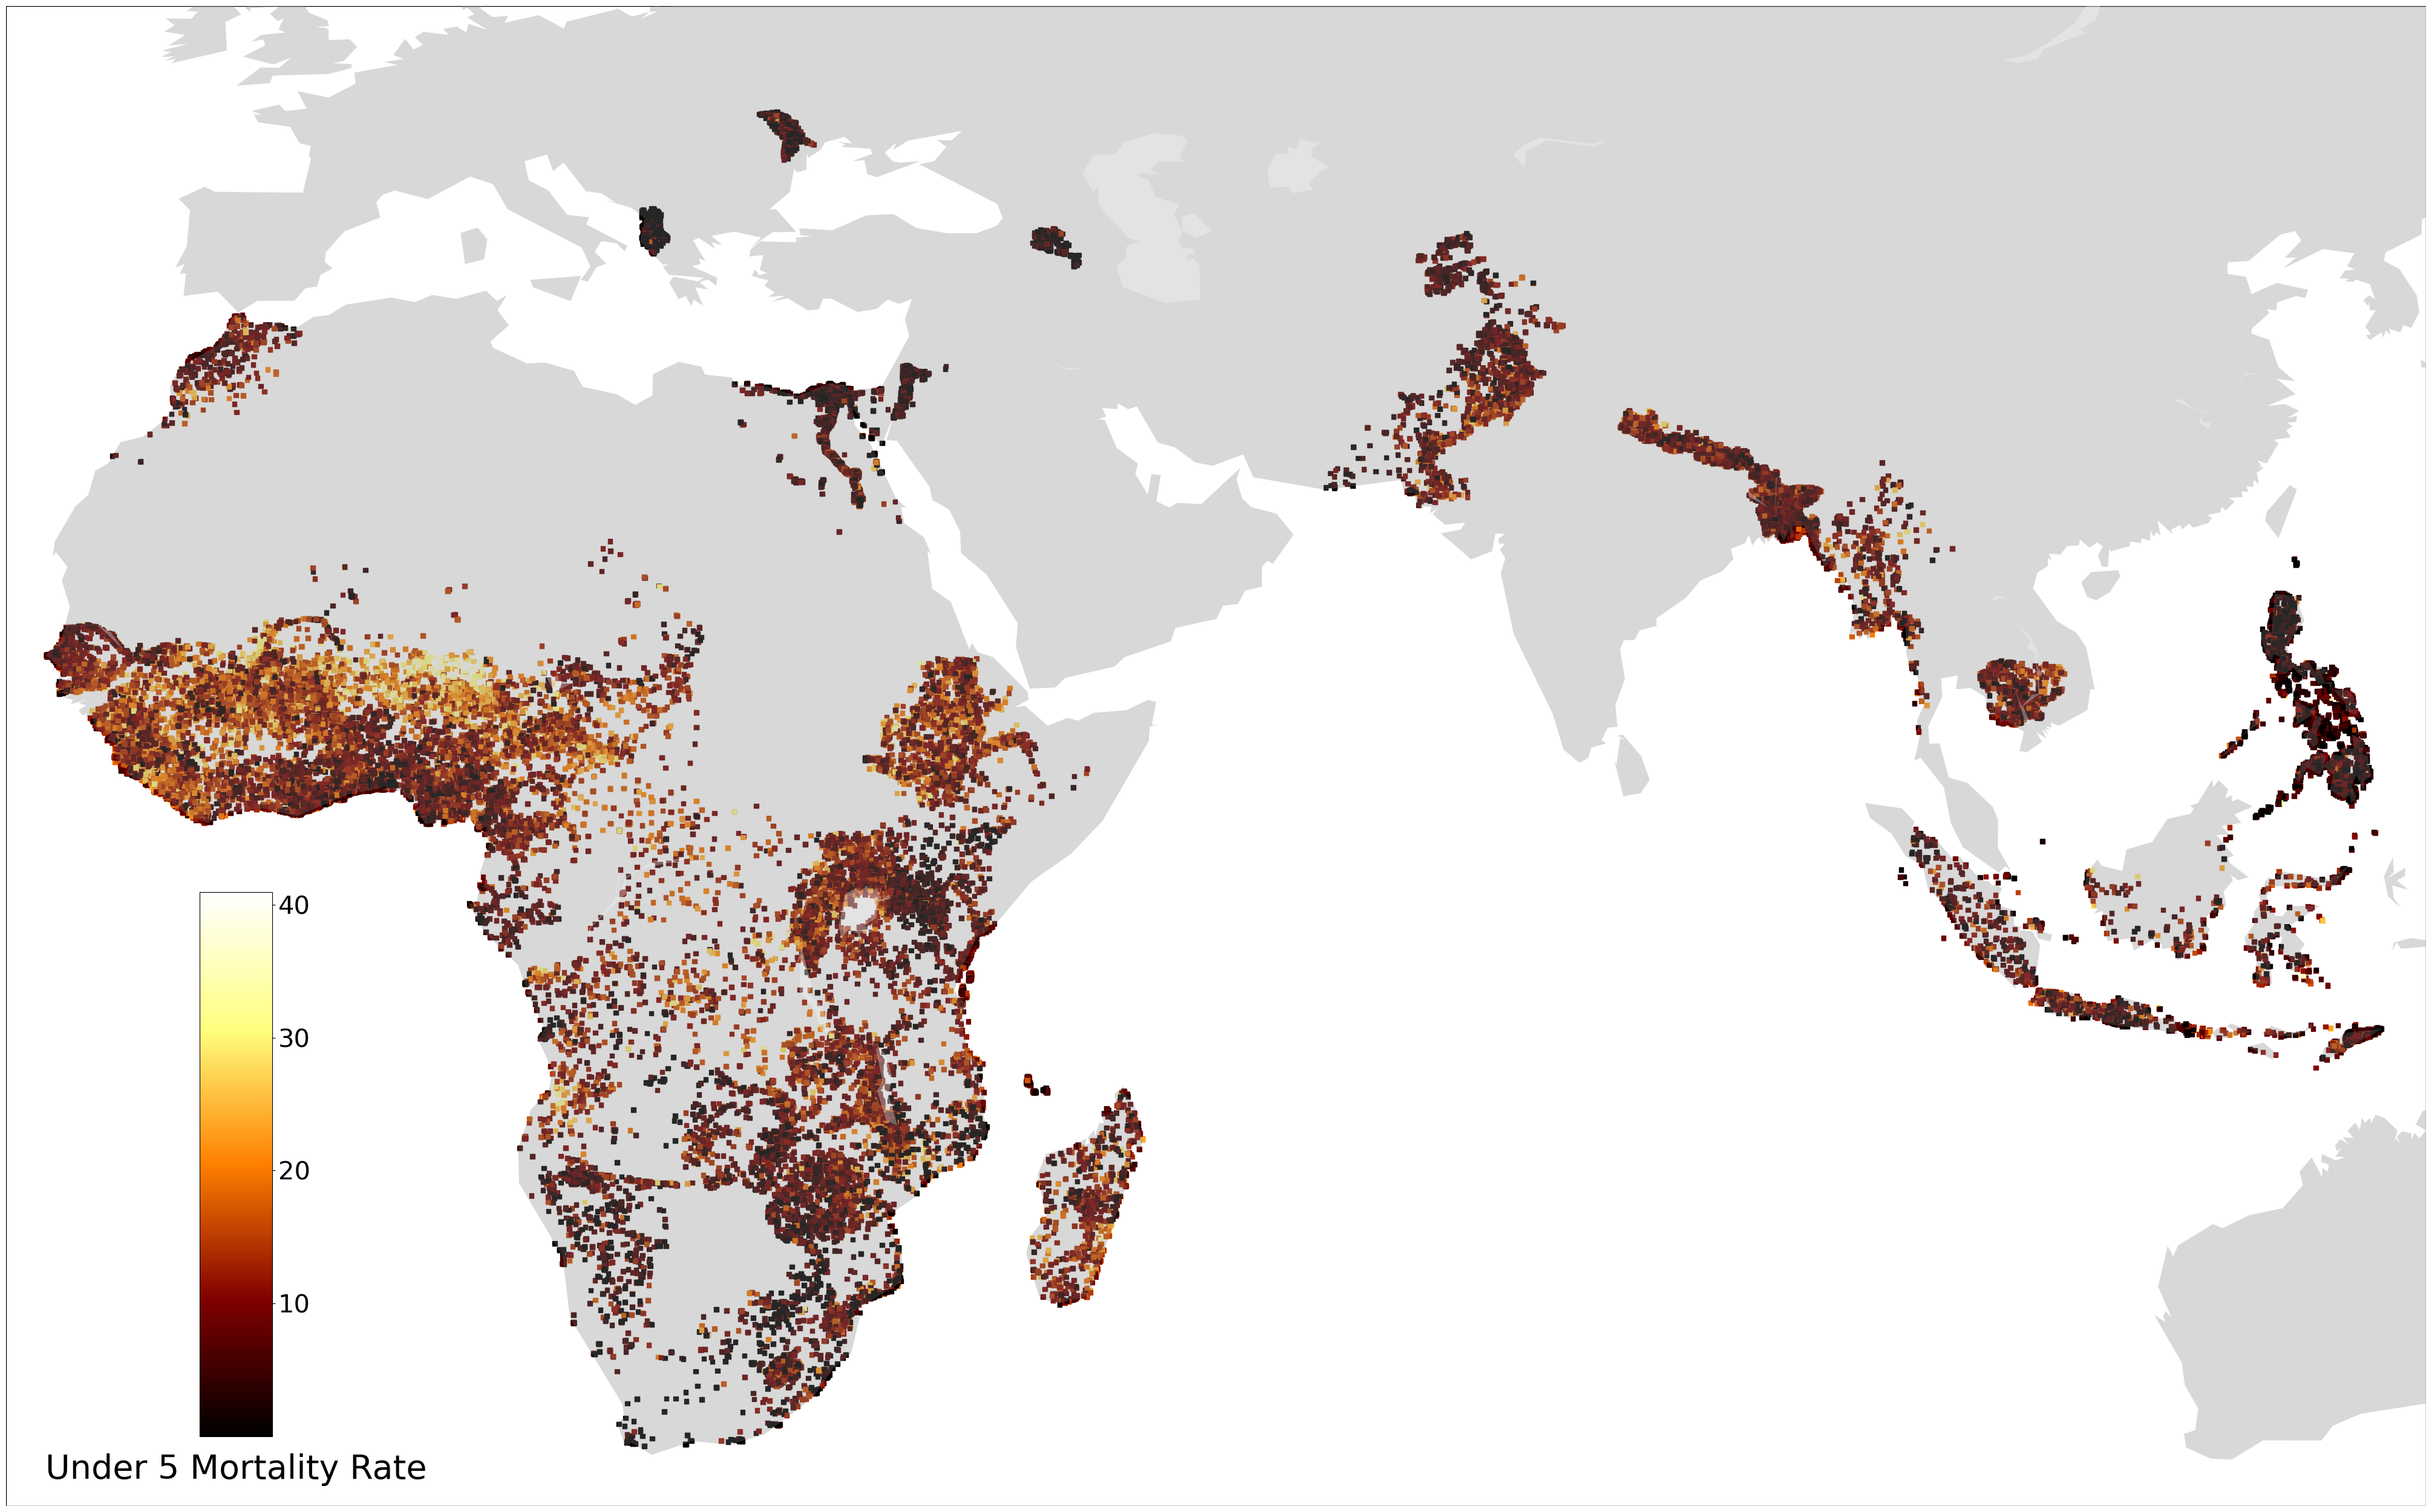

In [23]:
df = pd.read_csv('data/cleaned_hi.csv')

# ############ pre-process data for figure (12) ############

# remove data points with observations of (0.0, 0.0) for lat/lon
greater0lat = df['LATNUM'] > 0.0001
greater0lon = df['LONGNUM'] > 0.0001
mask = np.logical_or(greater0lat, greater0lon)
df_plot = df[mask]

# only 0 to 40 for under 5 mortality
mask = df_plot['Under5_Mortality_Rate'] <= 41.0
df_plot = df_plot[mask]

# ############ plot figure (12) ############
plt.style.use('default')
fig = plt.figure(figsize=(40, 30))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_facecolor('white')
ax.axis('off')

m=Basemap(llcrnrlon=-20, llcrnrlat=-38, urcrnrlon=130,urcrnrlat=55, projection='cyl')
m.drawmapboundary(fill_color='white')
m.fillcontinents(color='grey', alpha=0.3)
b = m.scatter(x=df_plot['LONGNUM'], y=df_plot['LATNUM'], latlon=True, c=df_plot['Under5_Mortality_Rate'],
          cmap='afmhot', alpha=1, s=30, marker=',')

cbaxes = fig.add_axes([0.08, 0.125, 0.03, 0.3])
cb = plt.colorbar(b, cax = cbaxes)
cb.set_ticks([10, 20, 30, 40])
cb.set_ticklabels(['10', '20', '30', '40'])
cb.ax.tick_params(labelsize=30)
cbaxes.set_xlabel("Under 5 Mortality Rate", size=40, loc='center', labelpad=20)
plt.savefig('figure/geo_under5_mortality_rate_0to40.png', dpi=300)
plt.show()